<a href="https://colab.research.google.com/github/Luis-a0/nb-earthquake-tracker/blob/master/Mapas_terremoto_interactivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import requests
import folium

from datetime import datetime

import pandas as pd

# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter


In [20]:
# Obtener los datos
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_week.geojson"
response = requests.get(url)
response

# Crear la base del mapa
map = folium.Map(location=(0, 0) ,zoom_start=2)


# geolocator = Nominatim(user_agent="ColabTerremosEstudio1")
# reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [21]:
# Función para obtener los datos de interes para el mapa
def gen_marcas(puntos):
    marcas = []
    for punto in puntos:
        list_coordinates = [punto['geometry']['coordinates'][1],
             punto['geometry']['coordinates'][0]]
        marcas.append({
            'coordinates': list_coordinates,
            'place': punto['properties']['place'],
            'mag': punto['properties']['mag'],
            'date': datetime.utcfromtimestamp(
                int(str(punto['properties']['time'])[:-3])),
            'url': punto['properties']['url'],
            })
    return marcas

# Función generadora de iconos según magnitud
def icon_color(magnitud):
    if magnitud <= 4:
        return folium.Icon("blue")
    elif magnitud <= 6:
        return folium.Icon("green")
    else:
        return folium.Icon("red")

# Función que toma como parametro las marcas y el mapa generados
# Y devuelve el mapa con las marcas agregadas
def add_marcas(marcas, map):
    for marca in marcas:
        folium.Marker(
            location=marca['coordinates'],
            tooltip=marca['place'],
            popup=f"Magnitud del terremoto:{marca['mag']}\nFecha:{marca['date']}",
            icon=icon_color(marca['mag']),
        ).add_to(map)
    return map

def convert_time(int_date):
    # Entero dado
    timestamp = int_date / 1000  # Convertir de milisegundos a segundos

    # Convertir el entero a una fecha y hora en formato UTC
    fecha_utc = datetime.utcfromtimestamp(timestamp)

    return fecha_utc.strftime("%d/%m/%Y, %H:%M:%S")

# Función que verifica si la cadena de caracteres representa un estado de US
def is_united_states(state):
    nombres_estados = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California",
    "Colorado", "Connecticut", "Delaware", "Florida", "Georgia",
    "Hawaii", "Hawái", "Idaho", "Illinois", "Indiana", "Iowa",
    "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland",
    "Massachusetts", "Michigan", "Minnesota", "Misisipi", "Missouri",
    "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey",
    "New Mexico", "Nuevo México", "New York", "North Carolina",
    "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pensilvania",
    "Rhode Island", "South Carolina","South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "Virginia Occidental",
    "Wisconsin", "Wyoming"
    ]

    abreviaturas_estados = [
    "AL", "AK", "AZ", "AR", "CA",
    "CO", "CT", "DE", "FL", "GA",
    "HI", "ID", "IL", "IN", "IA",
    "KS", "KY", "LA", "ME", "MD",
    "MA", "MI", "MN", "MS", "MO",
    "MT", "NE", "NV", "NH", "NJ",
    "NM", "NY", "NC", "ND", "OH",
    "OK", "OR", "PA", "RI", "SC",
    "SD", "TN", "TX", "UT", "VT",
    "VA", "WA", "WV", "WI", "WY"
    ]

    return (state in nombres_estados) or (state in abreviaturas_estados)


# Función que obtiene el país en el cual ocurrio el terremoto
def clean_country(place_element):
    country = place_element.split(",")[-1][1:]
    return "United States" if is_united_states(country) else country

In [22]:
# ALmacenar la información de interes en la variable "marcas"
puntos = response.json()['features']
# puntos[0]['geometry']['coordinates'][0]
marcas = gen_marcas(puntos)

In [23]:
map = add_marcas(marcas, map)

In [24]:
map

In [25]:
df = pd.DataFrame(marcas)

In [26]:
# lambda x: x.split(",")[-1][1:]

df['country'] = df['place'].apply(clean_country)

In [27]:
df

coordinates  \
0                      [62.1378, -149.4708]   
1                [36.5928345, -121.1496658]   
2                    [32.919, -116.2381667]   
3                      [62.3908, -148.3787]   
4                        [31.556, -104.011]   
...                                     ...   
1980                    [-5.8375, 130.2447]   
1981  [38.4971666666667, -112.903333333333]   
1982                      [41.572, -72.475]   
1983   [19.156665802002, -155.492492675781]   
1984                 [35.7186667, -117.561]   

                                    place   mag                date  \
0        19 km E of Susitna North, Alaska  2.10 2024-03-13 12:44:59   
1                 7 km N of Pinnacles, CA  1.36 2024-03-13 12:35:59   
2         27 km SSW of Ocotillo Wells, CA  0.85 2024-03-13 12:35:42   
3           66 km N of Chickaloon, Alaska  1.80 2024-03-13 12:31:37   
4                33 km NW of Toyah, Texas  1.90 2024-03-13 12:23:22   
...                                   ...   ...                 ...   
1980          278 km W of Tual, Indonesia  4.60 2024-03-06 13:28:59   
1981            14 km NE of Milford, Utah -0.02 2024-03-06 13:27:20   
1982  2 km E of East Hampton, Connecticut  1.70 2024-03-06 13:24:49   
1983           5 km SSW of Pāhala, Hawaii  2.21 2024-03-06 13:08:52   
1984           15 km NE of Ridgecrest, CA  1.54 2024-03-06 13:03:29   

                                                    url        country  
0     https://earthquake.usgs.gov/earthquakes/eventp...  United States  
1     https://earthquake.usgs.gov/earthquakes/eventp...  United States  
2     https://earthquake.usgs.gov/earthquakes/eventp...  United States  
3     https://earthquake.usgs.gov/earthquakes/eventp...  United States  
4     https://earthquake.usgs.gov/earthquakes/eventp...  United States  
...                                                 ...            ...  
1980  https://earthquake.usgs.gov/earthquakes/eventp...      Indonesia  
1981  https://earthquake.usgs.gov/earthquakes/eventp...  United States  
1982  https://earthquake.usgs.gov/earthquakes/eventp...  United States  
1983  https://earthquake.usgs.gov/earthquakes/eventp...  United States  
1984  https://earthquake.usgs.gov/earthquakes/eventp...  United States  

[1985 rows x 6 columns]

In [28]:
df['country'].value_counts()

United States                   1815
Puerto Rico                       54
Chile                             16
Japan                             10
Philippines                        7
MX                                 6
Peru                               6
China                              6
Indonesia                          5
Dominican Republic                 4
outh of the Fiji Islands           3
Costa Rica                         3
U.S. Virgin Islands                3
Fiji                               3
Russia                             3
Tonga                              3
Canada                             2
Afghanistan                        2
Myanmar                            2
India                              2
Italy                              2
Timor Leste                        2
Turkey                             2
Japan region                       2
Greece                             1
Croatia                            1
Guatemala                          1
M

<Axes: >

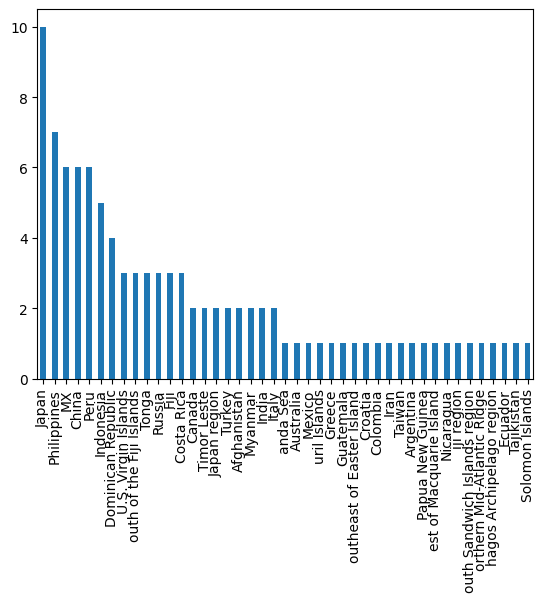

In [29]:
df_mask = df["country"] != "United States"
filtered_df = df[df_mask]
filtered_df['country'].value_counts()[2:].plot.bar()

In [30]:
def get_properties(data_dict):
    data_properties = []
    for element in data_dict:
        temp_dict = element['properties']
        temp_dict.update({'latitude': element['geometry']['coordinates'][1],
             'longitude': element['geometry']['coordinates'][0]})
        data_properties.append(temp_dict)
    return data_properties

data_properties = get_properties(response.json()['features'])

df = pd.DataFrame.from_dict(data_properties, orient='columns')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mag        1985 non-null   float64
 1   place      1985 non-null   object 
 2   time       1985 non-null   int64  
 3   updated    1985 non-null   int64  
 4   tz         0 non-null      object 
 5   url        1985 non-null   object 
 6   detail     1985 non-null   object 
 7   felt       112 non-null    float64
 8   cdi        112 non-null    float64
 9   mmi        12 non-null     float64
 10  alert      4 non-null      object 
 11  status     1985 non-null   object 
 12  tsunami    1985 non-null   int64  
 13  sig        1985 non-null   int64  
 14  net        1985 non-null   object 
 15  code       1985 non-null   object 
 16  ids        1985 non-null   object 
 17  sources    1985 non-null   object 
 18  types      1985 non-null   object 
 19  nst        1662 non-null   float64
 20  dmin    

In [32]:
import plotly.express as px
import pandas as pd

# Suponiendo que tienes un DataFrame llamado 'df' con los datos de los terremotos
fig = px.density_mapbox(df, lat='latitude', lon='longitude', z='mag', radius=10,
                        center=dict(lat=0, lon=0), zoom=1,
                        mapbox_style="carto-positron")
fig.show()


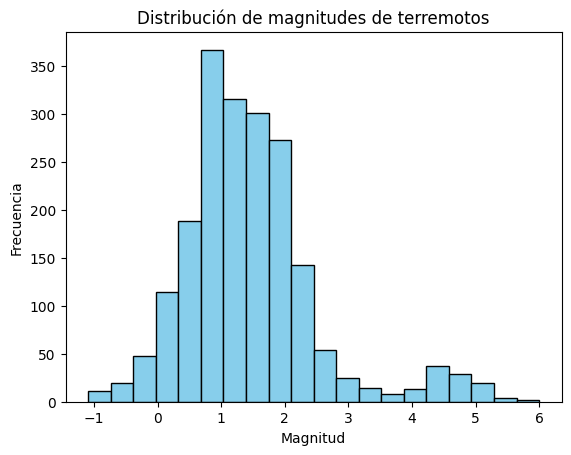

In [33]:
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame
plt.hist(df['mag'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de magnitudes de terremotos')
plt.show()

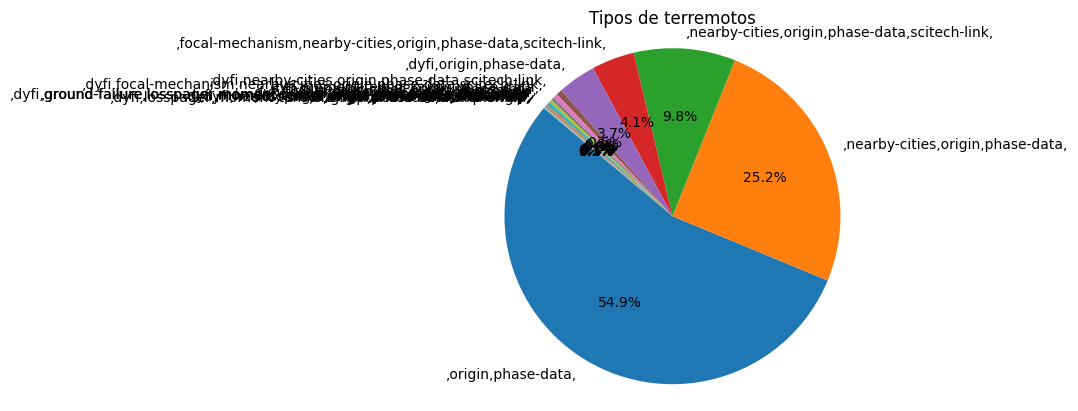

In [34]:
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame
tipo_counts = df['types'].value_counts()
plt.pie(tipo_counts, labels=tipo_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Tipos de terremotos')
plt.show()
